In [6]:
!pip install -q streamlit pyngrok google-generativeai


In [2]:
import streamlit as st
import google.generativeai as genai

In [ ]:
API_KEY = "" # eta amr api kintu :3
genai.configure(api_key=API_KEY)
model = genai.GenerativeModel("gemini-2.5-flash")

In [17]:
chat = model.start_chat(history=[])

while True:
    user_input = input("You: ")
    if user_input.lower() in ["exit", "quit"]:
        print("Goodbye!")
        break
    response = chat.send_message(user_input)
    print("Bot:", response.text)


You: hi
Bot: Hi there! How can I help you today?
You: exit
Goodbye!


In [ ]:
%%writefile app.py
import streamlit as st
import google.generativeai as genai

st.set_page_config(page_title="Gemini Chatbot", page_icon="🤖")
st.title("Let's talk using gemini!!!! ")

# Ask user for API key
api_key = st.text_input("Enter your Gemini API key:", type="password")

if api_key:
    genai.configure(api_key=api_key)
    model = genai.GenerativeModel("gemini-2.5-flash")

    if "chat_history" not in st.session_state:
        st.session_state.chat_history = []

    user_input = st.text_input("You:", placeholder="Type your message here...")

    if st.button("Send") and user_input:
        with st.spinner("Thinking..."):
            response = model.generate_content(user_input)
            st.session_state.chat_history.append(("You", user_input))
            st.session_state.chat_history.append(("Bot", response.text))


    for sender, message in st.session_state.chat_history:
        if sender == "You":
            st.markdown(f"**{sender}:** {message}")
        else:
            st.markdown(f"**{sender}:** {message}")

else:
    st.warning("Please enter your Gemini API key to start chatting.")

In [23]:
%%writefile app.py
import streamlit as st
import google.generativeai as genai

st.set_page_config(page_title="Let's talk!!!!", page_icon="🤖")
st.title("Chatbot using Gemini API: (Continuous Chat)")


api_key = st.text_input("Enter your Gemini API key:", type="password")
if api_key:
    genai.configure(api_key=api_key)
    model = genai.GenerativeModel("gemini-2.5-flash")


    if "chat_history" not in st.session_state:
        st.session_state.chat_history = []
    for sender, message in st.session_state.chat_history:
        if sender == "You":
            st.chat_message("user").write(message)
        else:
            st.chat_message("assistant").write(message)



    user_input = st.chat_input("Type your message here...")
    if user_input:
        st.session_state.chat_history.append(("You", user_input))
        st.chat_message("user").write(user_input)

        with st.spinner("Thinking..."):
            response = model.generate_content(user_input)
            bot_message = response.text
            st.session_state.chat_history.append(("Bot", bot_message))
            st.chat_message("assistant").write(bot_message)

else:
    st.warning("Please enter your Gemini API key to start chatting.")


Overwriting app.py


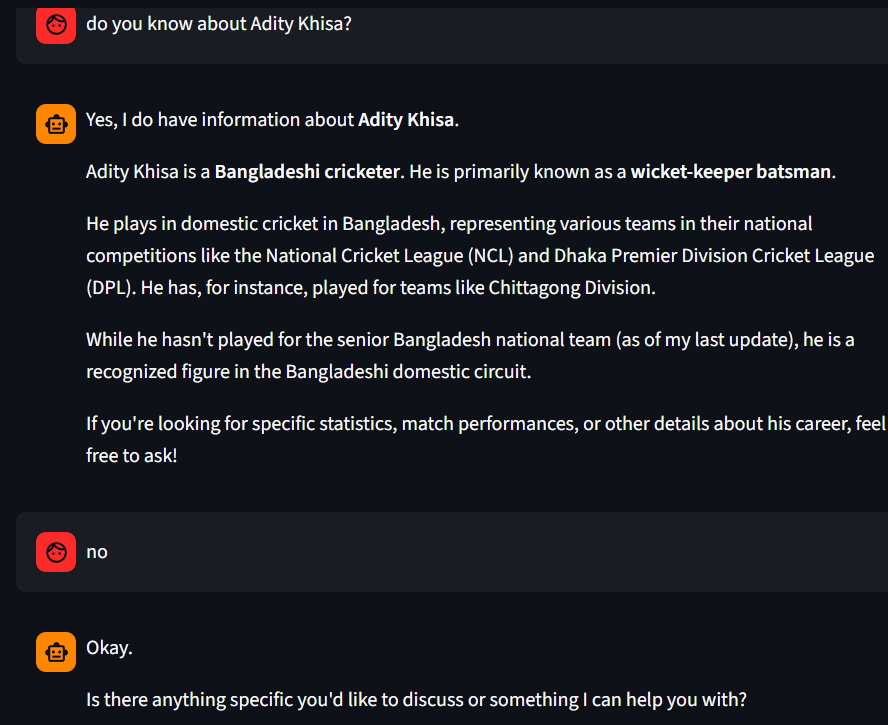

In [24]:
%%writefile app.py
import streamlit as st
import google.generativeai as genai

st.set_page_config(page_title="Let's talk with Gemini!!!", page_icon="🤖")
st.title("Chatbot using Gemini API: (Memory Chat)")
api_key = st.text_input("Enter your Gemini API key:", type="password")

if api_key:
    genai.configure(api_key=api_key)
    model = genai.GenerativeModel("gemini-2.5-flash")
    if "chat_history" not in st.session_state:
        st.session_state.chat_history = []
    for sender, message in st.session_state.chat_history:
        if sender == "You":
            st.chat_message("user").write(message)
        else:
            st.chat_message("assistant").write(message)


    user_input = st.chat_input("Type your message here...")
    if user_input:
        st.session_state.chat_history.append(("You", user_input))
        st.chat_message("user").write(user_input)

        with st.spinner("Thinking..."):
            conversation = ""
            for sender, message in st.session_state.chat_history:
                if sender == "You":
                    conversation += f"You: {message}\n"
                else:
                    conversation += f"Bot: {message}\n"
            conversation += "Bot:"


            response = model.generate_content(conversation)
            bot_message = response.text
            st.session_state.chat_history.append(("Bot", bot_message))
            st.chat_message("assistant").write(bot_message)

else:
    st.warning("Please enter your Gemini API key to start chatting.")


Overwriting app.py


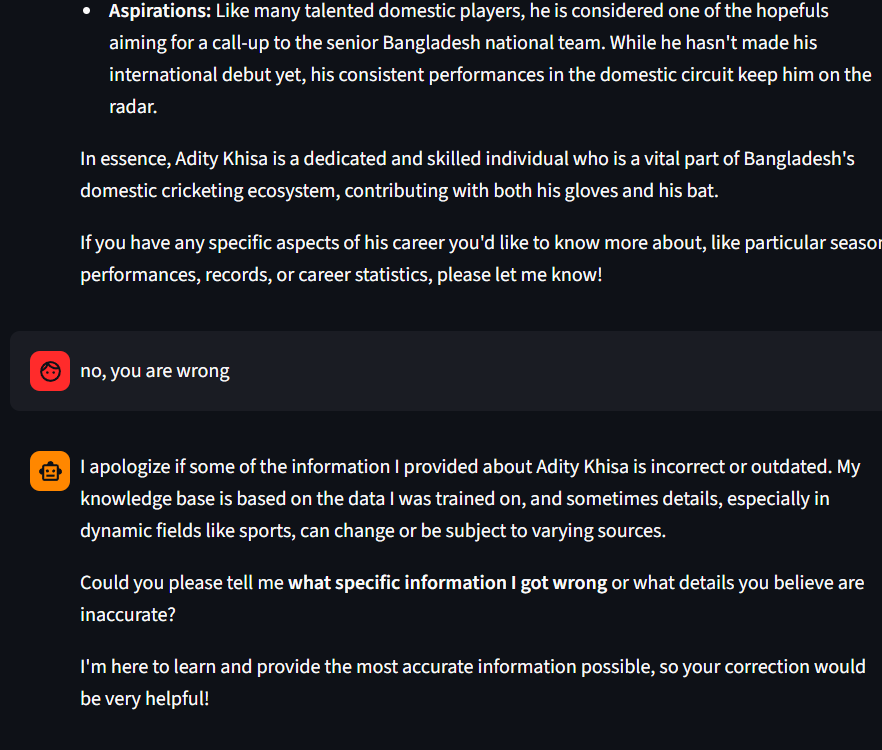

In [30]:
%%writefile app.py
import streamlit as st
import importlib
import requests

st.set_page_config(page_title="Universal Chatbot", page_icon="🤖")
st.title("Universal Chatbot — Use Any Model, Any API")


provider = st.text_input("Enter Provider (e.g., 'openai', 'gemini', 'ollama', 'huggingface')", value="openai")
model_name = st.text_input("Enter Model Name (e.g., 'gpt-4', 'gemini-2.0-flash', 'llama3', etc.)")
api_key = st.text_input("Enter your API Key (if required):", type="password")
custom_endpoint = st.text_input("Optional: Custom API Endpoint (for Ollama, Local LLMs, etc.)")


if "chat_history" not in st.session_state:
    st.session_state.chat_history = []

for sender, message in st.session_state.chat_history:
    if sender == "You":
        st.chat_message("user").write(message)
    else:
        st.chat_message("assistant").write(message)

user_input = st.chat_input("Type your message here...")
def generate_response(provider, model_name, api_key, prompt, custom_endpoint=None):
    provider = provider.lower().strip()


    if provider == "gemini":
        try:
            genai = importlib.import_module("google.generativeai")
            genai.configure(api_key=api_key)
            model = genai.GenerativeModel(model_name)
            response = model.generate_content(prompt)
            return response.text
        except Exception as e:
            return f"[Gemini Error] {e}"

    elif provider == "openai":
        try:
            openai = importlib.import_module("openai")
            openai.api_key = api_key
            completion = openai.ChatCompletion.create(
                model=model_name,
                messages=[{"role": "user", "content": prompt}]
            )
            return completion.choices[0].message.content
        except Exception as e:
            return f"[OpenAI Error] {e}"

    elif provider == "ollama" or custom_endpoint:
        try:
            endpoint = custom_endpoint or f"http://localhost:11434/api/generate"
            response = requests.post(endpoint, json={"model": model_name, "prompt": prompt})
            if response.status_code == 200:
                data = response.json()
                return data.get("response") or data.get("message") or str(data)
            else:
                return f"[Custom API Error] {response.status_code}: {response.text}"
        except Exception as e:
            return f"[Custom Endpoint Error] {e}"

    elif provider == "huggingface":
        try:
            headers = {"Authorization": f"Bearer {api_key}"}
            url = f"https://api-inference.huggingface.co/models/{model_name}"
            payload = {"inputs": prompt}
            response = requests.post(url, headers=headers, json=payload)
            if response.status_code == 200:
                data = response.json()
                if isinstance(data, list) and "generated_text" in data[0]:
                    return data[0]["generated_text"]
                return str(data)
            else:
                return f"[HF Error] {response.status_code}: {response.text}"
        except Exception as e:
            return f"[HuggingFace Error] {e}"

    else:
        return f"Provider '{provider}' not supported yet. Please use Gemini, OpenAI, HuggingFace, or custom endpoint."


if user_input:
    st.session_state.chat_history.append(("You", user_input))
    st.chat_message("user").write(user_input)

    with st.spinner("Thinking..."):
        conversation = ""
        for sender, message in st.session_state.chat_history:
            conversation += f"{sender}: {message}\n"
        conversation += "Bot:"

        bot_message = generate_response(provider, model_name, api_key, conversation, custom_endpoint)
        st.session_state.chat_history.append(("Bot", bot_message))
        st.chat_message("assistant").write(bot_message)


Overwriting app.py


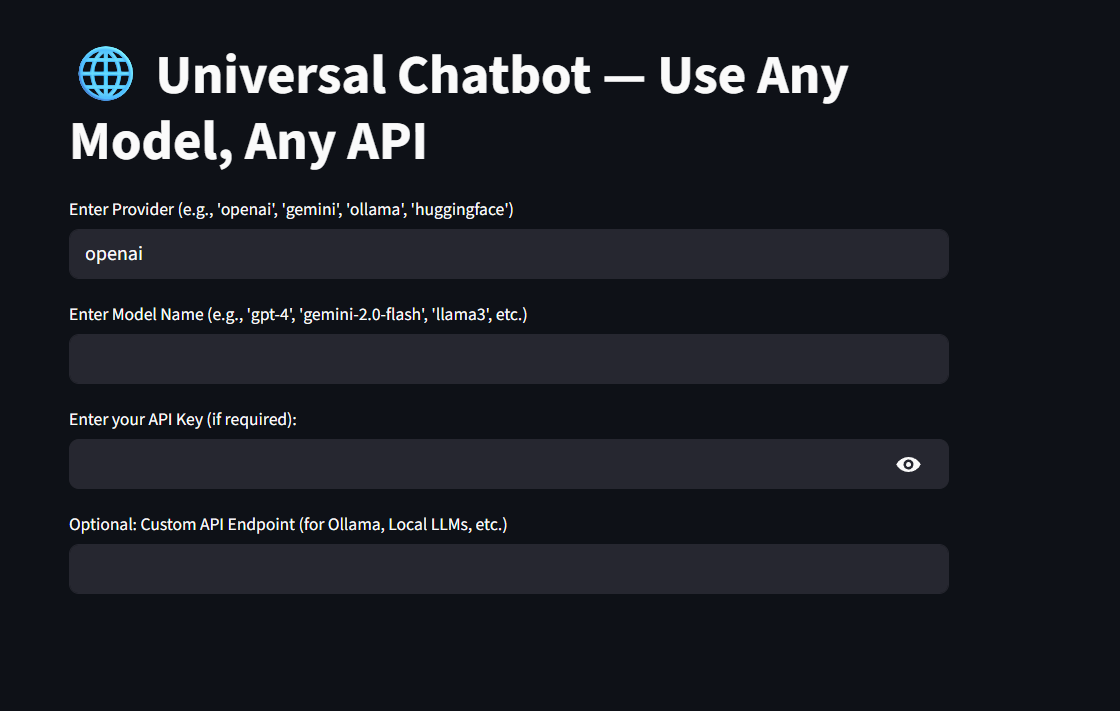

In [ ]:
%%writefile app.py
import streamlit as st
import importlib
import requests


st.set_page_config(page_title="Universal Chatbot", page_icon="🤖")
st.title("Universal Chatbot — Any Model, Any API")


provider = st.selectbox("Select Provider", ["OpenAI", "Gemini", "Groq", "HuggingFace", "Ollama", "Custom"])
model_name = st.text_input("Enter Model Name", value="llama3-70b-8192" if provider=="Groq" else "gpt-4")
api_key = st.text_input("Enter your API Key:", type="password")


custom_endpoint = st.text_input("Optional Custom API Endpoint (for Ollama or custom servers):")


if "chat_history" not in st.session_state:
    st.session_state.chat_history = []

for sender, message in st.session_state.chat_history:
    if sender == "You":
        st.chat_message("user").write(message)
    else:
        st.chat_message("assistant").write(message)

user_input = st.chat_input("Type your message here...")


def generate_response(provider, model_name, api_key, prompt, custom_endpoint=None):
    provider = provider.lower().strip()

    if provider == "gemini":
        try:
            genai = importlib.import_module("google.generativeai")
            genai.configure(api_key=api_key)
            model = genai.GenerativeModel(model_name)
            response = model.generate_content(prompt)
            return response.text
        except Exception as e:
            return f"[Gemini Error] {e}"

    elif provider == "openai":
        try:
            openai = importlib.import_module("openai")
            openai.api_key = api_key
            completion = openai.ChatCompletion.create(
                model=model_name,
                messages=[{"role": "user", "content": prompt}]
            )
            return completion.choices[0].message.content
        except Exception as e:
            return f"[OpenAI Error] {e}"


    elif provider == "groq":
        try:
            headers = {
                "Authorization": f"Bearer {api_key}",
                "Content-Type": "application/json"
            }
            url = "https://api.groq.com/openai/v1/chat/completions"
            payload = {
                "model": model_name,
                "messages": [{"role": "user", "content": prompt}],
                "temperature": 0.7
            }
            response = requests.post(url, headers=headers, json=payload)
            if response.status_code == 200:
                data = response.json()
                return data["choices"][0]["message"]["content"]
            else:
                return f"[Groq Error] {response.status_code}: {response.text}"
        except Exception as e:
            return f"[Groq Error] {e}"

    elif provider == "huggingface":
        try:
            headers = {"Authorization": f"Bearer {api_key}"}
            url = f"https://api-inference.huggingface.co/models/{model_name}"
            response = requests.post(url, headers=headers, json={"inputs": prompt})
            if response.status_code == 200:
                data = response.json()
                if isinstance(data, list) and "generated_text" in data[0]:
                    return data[0]["generated_text"]
                return str(data)
            else:
                return f"[HuggingFace Error] {response.status_code}: {response.text}"
        except Exception as e:
            return f"[HuggingFace Error] {e}"

    # --- Ollama or custom/local ---
    elif provider == "ollama" or custom_endpoint:
        try:
            endpoint = custom_endpoint or "http://localhost:11434/api/generate"
            response = requests.post(endpoint, json={"model": model_name, "prompt": prompt})
            if response.status_code == 200:
                data = response.json()
                return data.get("response") or data.get("message") or str(data)
            else:
                return f"[Custom API Error] {response.status_code}: {response.text}"
        except Exception as e:
            return f"[Custom Endpoint Error] {e}"

    else:
        return f"Provider '{provider}' not supported yet."

if user_input:
    st.session_state.chat_history.append(("You", user_input))
    st.chat_message("user").write(user_input)

    with st.spinner("Thinking..."):
        conversation = ""
        for sender, message in st.session_state.chat_history:
            conversation += f"{sender}: {message}\n"
        conversation += "Bot:"

        bot_message = generate_response(provider, model_name, api_key, conversation, custom_endpoint)
        st.session_state.chat_history.append(("Bot", bot_message))
        st.chat_message("assistant").write(bot_message)


In [10]:
!ngrok config add-authtoken 30SgnpBDdy6Mx8r3iI5CVJAKvew_33mfURpPUu5wRgDJdX9WM

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [19]:
from pyngrok import ngrok
import subprocess

ngrok.kill()
print("Starting Streamlit app...")
streamlit_proc = subprocess.Popen(["streamlit", "run", "app.py"])
public_url = ngrok.connect(8501)
print(f"🌐 Open this Streamlit app link:\n{public_url}")


Starting Streamlit app...
🌐 Open this Streamlit app link:
NgrokTunnel: "https://2663489766b6.ngrok-free.app" -> "http://localhost:8501"
